In [693]:
import pandas as pd
import sqlite3
from sqlite3 import Error
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [694]:
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        SELECT * FROM 
                            Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
                    '''
master_statement2  = '''
                        SELECT LotFrontage, LotArea, MasVnrArea, GrLivArea, GarageArea, OverallQual, GarageCars from Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
							
                    '''

df = pd.read_sql_query(master_statement, conn)
df.drop(['Aeminities_id'], axis= 1, inplace=True)

df.drop(['Area_id'], axis= 1, inplace=True)

df.drop(['Construction_id'], axis= 1, inplace=True)

df.drop(['Dwelling_id'], axis= 1, inplace=True)

df.drop(['Utility_id'], axis= 1, inplace=True)



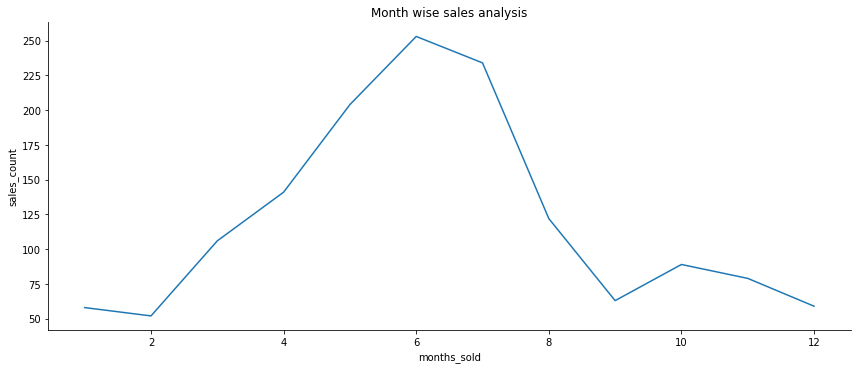

In [695]:
#SCT month_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select MoSold as months_sold, count(1) as sales_count
from Sale
group by MoSold
order by sales_count desc
							
                    '''

df_month_count_sold = pd.read_sql_query(master_statement, conn)
sns.relplot(
    data=df_month_count_sold, 
    x="months_sold", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="Month wise sales analysis")



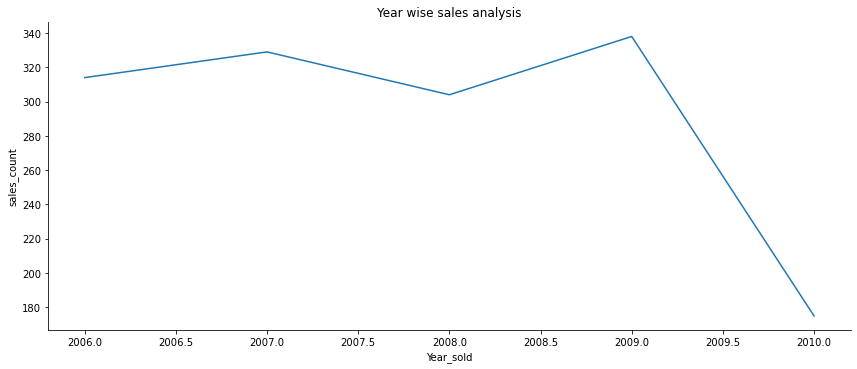

In [696]:
#SCT year_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select YrSold as Year_sold, count(1) as sales_count
from Sale
group by YrSold
order by sales_count desc
							
                    '''

df_year_count_sold = pd.read_sql_query(master_statement, conn)

sns.relplot(
    data=df_year_count_sold, 
    x="Year_sold", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="Year wise sales analysis")




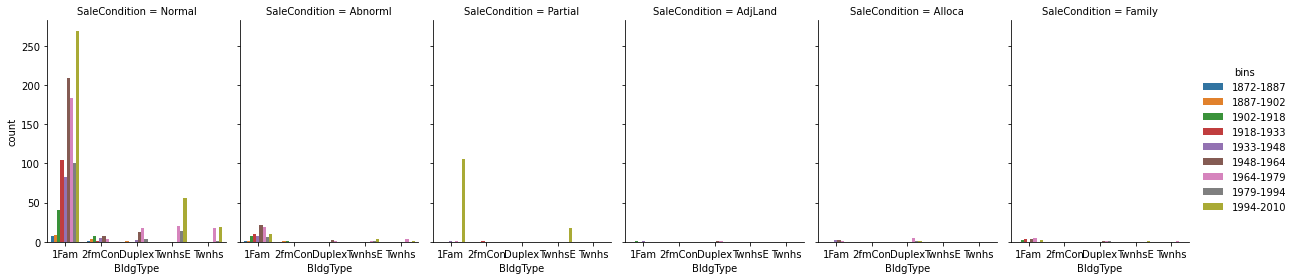

In [697]:
#SCT SaleCondition_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select SaleCondition, YearBuilt, BldgType
FROM Sale NATURAL JOIN Construction NATURAL JOIN Dwelling
							
                    '''

sale_conditions_df = pd.read_sql_query(master_statement, conn)

import seaborn as sns
min_value = sale_conditions_df['YearBuilt'].min()
max_value = sale_conditions_df['YearBuilt'].max()

import numpy as np
bins =np.linspace(min_value,max_value,10)
bins =[int(i) for i in bins]

labels = []
for ind,i in enumerate(bins):
    try:
        labels.append(str(i)+'-'+str(bins[ind+1]))
    except:
        pass
sale_conditions_df['bins'] = pd.cut(sale_conditions_df['YearBuilt'], bins=bins, labels=labels, include_lowest=True)

g = sns.catplot(hue="bins", x="BldgType", col="SaleCondition",
                data=sale_conditions_df, kind="count",
                height=4, aspect=.7)

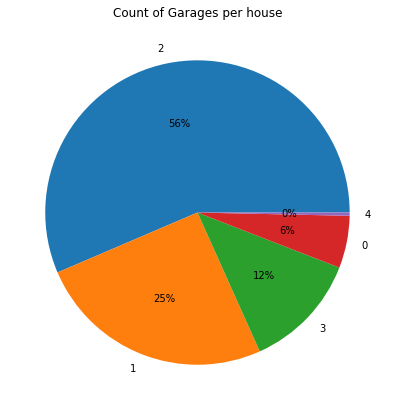

In [698]:
#SCT GarageCars
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select GarageCars, LotArea, SalePrice/LotArea
from Sale NATURAL JOIN Utility NATURAL JOIN Area
							
                    '''

df_GarageCars_count_sold = pd.read_sql_query(master_statement, conn)
value_counts_garage = pd.DataFrame(df_GarageCars_count_sold.GarageCars.value_counts(normalize = True))
value_counts_garage['GarageCars']
value_counts_garage.index
from matplotlib import pyplot as plt
import numpy as np
cars = value_counts_garage.index
data = value_counts_garage['GarageCars']
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars,   autopct=lambda p: '{:.0f}%'.format(p))
plt.title('Count of Garages per house')
plt.show()


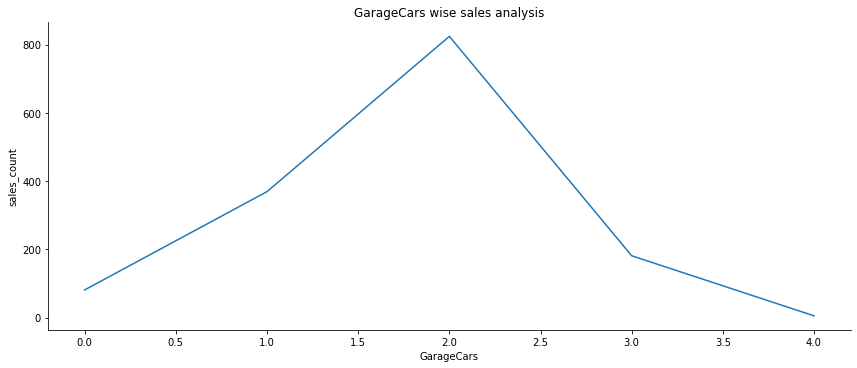

In [699]:
#SCT GarageCars_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select GarageCars, count(1) as sales_count
from Sale JOIN Utility ON Sale.Id = Utility.Id
group by GarageCars
order by sales_count desc
							
                    '''

df_GarageCars_count_sold = pd.read_sql_query(master_statement, conn)

sns.relplot(
    data=df_GarageCars_count_sold, 
    x="GarageCars", y="sales_count",
    height=5, aspect=2.4, 
    kind="line"
).set(title="GarageCars wise sales analysis")
# df_year_count_sold['YearBuilt'].unique()
# df_year_count_sold.to_csv('GarageCars_count.csv')
# df_GarageCars_count_sold


    YrSold  MoSold  price_sum  ranking
0     2006       7   12275141        1
1     2006       6    8269600        2
2     2006       5    6039275        3
3     2006       4    4706446        4
4     2006       3    4624555        5
5     2007       6   10603823        1
6     2007       7    9965239        2
7     2007       8    7357643        3
8     2007       5    7304561        4
9     2007      11    4745024        5
10    2008       6    8656278        1
11    2008       7    8553570        2
12    2008       5    7156710        3
13    2008       8    5686232        4
14    2008       4    4141627        5
15    2009       7   12077049        1
16    2009       6   10812395        2
17    2009       5    6085869        3
18    2009       8    4970129        4
19    2009      10    4730578        5
20    2010       5    8564268        1
21    2010       4    6682417        2
22    2010       6    6539025        3
23    2010       3    4266807        4
24    2010       2    262

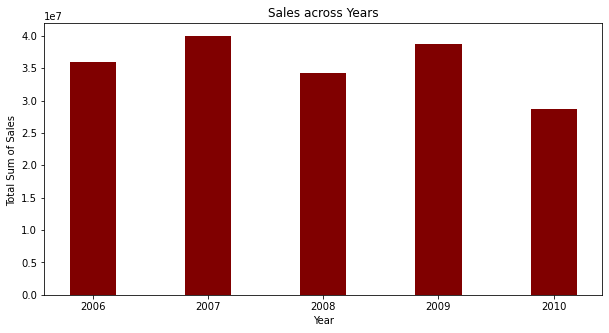

In [700]:
#SCT month_sold_ranking_count_sold
try:
    conn = sqlite3.connect("house_price.db")
    conn.execute("PRAGMA foreign_keys = 1")
except Error as e:
    print(e)


master_statement  = '''
                        select * from
(
select YrSold,MoSold, price_sum, row_number() over (partition by YrSold order by price_sum desc) as ranking
from (
select YrSold, MoSold, sum(SalePrice) as price_sum 
from Sale
group by YrSold, MoSold
)  a
) b
where ranking <=5 
order by YrSold,ranking
							
                    '''

month_sold_ranking_count_sold = pd.read_sql_query(master_statement, conn)
print(month_sold_ranking_count_sold)
groups = month_sold_ranking_count_sold.groupby(['YrSold'])['price_sum'].sum()
sales = pd.DataFrame(groups)
import numpy as np
import matplotlib.pyplot as plt
years = sales.index
values = sales['price_sum']
fig = plt.figure(figsize = (10, 5))
plt.bar(years, values, color ='maroon',
width = 0.4)
plt.xlabel("Year")
plt.ylabel("Total Sum of Sales ")
plt.title("Sales across Years")
plt.show()

In [701]:
master_statement  = '''
                        SELECT * FROM 
                            Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
                    '''
master_statement2  = '''
                        SELECT LotFrontage, LotArea, MasVnrArea, GrLivArea, GarageArea, OverallQual, GarageCars from Dwelling 
                            NATURAL JOIN Aeminities
                            NATURAL JOIN Construction
                            NATURAL JOIN Area
                            NATURAL JOIN Utility
                            NATURAL JOIN Sale
							
                    '''

df = pd.read_sql_query(master_statement, conn)
df.drop(['Aeminities_id'], axis= 1, inplace=True)

df.drop(['Area_id'], axis= 1, inplace=True)

df.drop(['Construction_id'], axis= 1, inplace=True)

df.drop(['Dwelling_id'], axis= 1, inplace=True)

df.drop(['Utility_id'], axis= 1, inplace=True)

In [702]:
list(df.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'Utilities',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'LotArea',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '_1stFlrSF',
 '_2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '_3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFin

In [703]:
df.head()

Id  MSSubClass MSZoning  LotFrontage Street Alley Utilities Neighborhood  \
0   1          60       RL         65.0   Pave  None    AllPub      CollgCr   
1   2          20       RL         80.0   Pave  None    AllPub      Veenker   
2   3          60       RL         68.0   Pave  None    AllPub      CollgCr   
3   4          70       RL         60.0   Pave  None    AllPub      Crawfor   
4   5          60       RL         84.0   Pave  None    AllPub      NoRidge   

  Condition1 Condition2  ... GarageCond PoolQC Fence MiscFeature MiscVal  \
0       Norm       Norm  ...         TA   None  None        None       0   
1      Feedr       Norm  ...         TA   None  None        None       0   
2       Norm       Norm  ...         TA   None  None        None       0   
3       Norm       Norm  ...         TA   None  None        None       0   
4       Norm       Norm  ...         TA   None  None        None       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 81 columns]

In [704]:
df.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
EnclosedPorch       0
_2ndFlrSF           0
_1stFlrSF           0
TotalBsmtSF         0
LowQualFinSF        0
GrLivArea           0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
Id                  0
_3SsnPorch          0
ScreenPorch         0
PoolArea            0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
BsmtUnfSF           0
Fireplaces          0
GarageCars          0
GarageArea          0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
Functional          0
LotArea   

In [705]:
X, y  = df.iloc[0:,0:85], df.iloc[0:,85:86]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [706]:
# df.info()

In [707]:
DATA=df
DATA['MSZoning'].fillna("RL", inplace=True)
DATA.LotFrontage.fillna(0, inplace=True)
DATA.Alley.fillna("NO", inplace=True)
DATA.Utilities.fillna('AllPub', inplace=True)
DATA.Exterior1st.fillna("VinylSd", inplace=True)
DATA.Exterior2nd.fillna("VinylSd", inplace=True)
DATA.MasVnrArea.fillna(0., inplace=True)
DATA.BsmtCond.fillna("No", inplace=True)
DATA.BsmtExposure.fillna("NB", inplace=True)
DATA.BsmtFinType1.fillna("NB", inplace=True)
DATA.BsmtFinSF1.fillna(0., inplace=True)
DATA.BsmtFinSF2.fillna(0., inplace=True)
DATA.BsmtUnfSF.fillna(0., inplace=True)
DATA.TotalBsmtSF.fillna(0., inplace=True)
DATA.Electrical.fillna("SBrkr", inplace=True)
DATA.BsmtFullBath.fillna(0., inplace=True)
DATA.BsmtHalfBath.fillna(0., inplace=True)
DATA.KitchenQual.fillna("TA", inplace=True)
DATA.Functional.fillna('Typ', inplace=True)
DATA.FireplaceQu.fillna("No", inplace=True)
DATA.GarageType.fillna("No", inplace=True)
DATA.GarageYrBlt.fillna(0, inplace=True)
DATA.GarageFinish.fillna("No", inplace=True)
DATA.GarageCars.fillna(0, inplace=True)
DATA.GarageArea.fillna(0, inplace=True)
DATA.GarageQual.fillna("No", inplace=True)
DATA.GarageCond.fillna("No", inplace=True)
DATA.PoolQC.fillna("No", inplace=True)
DATA.Fence.fillna("No", inplace=True)
DATA.MiscFeature.fillna("No", inplace=True)
DATA.SaleType.fillna("Con", inplace=True)
DATA.SaleCondition.fillna("Normal", inplace=True)

DATA.BsmtFullBath.replace(3.0, 2.0, inplace=True)
DATA.BsmtFullBath = DATA.BsmtFullBath.astype('int')
DATA.BsmtHalfBath = DATA.BsmtHalfBath.astype('int')
DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([0, 1])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


In [708]:
DATA['GarageAgeCat']

0       recent
1          old
2       recent
3          old
4       recent
5          old
6       recent
7          old
8          old
9          old
10         old
11      recent
12         old
13      recent
14         old
15         old
16         old
17         old
18      recent
19         old
20      recent
21         old
22      recent
23         old
24         old
25      recent
26      recent
27      recent
28         old
29         old
30         old
31         old
32      recent
33         old
34      recent
35      recent
36         old
37         old
38         old
39         old
40         old
41         old
42         old
43         old
44         old
45      recent
46      recent
47      recent
48         old
49         old
50         old
51         old
52         old
53         old
54         old
55         old
56         old
57      recent
58      recent
59         old
60      recent
61         old
62      recent
63         old
64         old
65      recent
66        

In [709]:
DATA['LotFrontage'] = DATA.groupby(['Neighborhood', 'Street'])[
    'LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [710]:
DATA['KitchenAbvGr']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      1
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      1
75      0
76      0
77      0
78      1
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      1
94      0
95      0
96      0
97      0
98      0
99      0


In [711]:
# DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([1, 2])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


In [712]:
marks = {"No": 0, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}


def mark_to_num(mark):
    return marks[mark]


DATA['ExterQual'] = DATA['ExterQual'].apply(mark_to_num)
DATA['ExterCond'] = DATA['ExterCond'].apply(mark_to_num)
DATA['HeatingQC'] = DATA['HeatingQC'].apply(mark_to_num)
DATA['KitchenQual'] = DATA['KitchenQual'].apply(mark_to_num)
DATA['FireplaceQu'] = DATA['FireplaceQu'].apply(mark_to_num)
DATA['GarageQual'] = DATA['GarageQual'].apply(mark_to_num)
DATA['GarageCond'] = DATA['GarageCond'].apply(mark_to_num)
DATA['PoolQC'] = DATA['PoolQC'].apply(mark_to_num)


In [713]:
DATA.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley',
       'Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'LotArea',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageTy

In [714]:
DATA['BsmtFinSF'] = DATA.BsmtFinSF1 + DATA.BsmtFinSF2
DATA['Porch'] = DATA.ScreenPorch + DATA.EnclosedPorch + \
    DATA.OpenPorchSF + DATA.WoodDeckSF
DATA['Total_surface'] = DATA.TotalBsmtSF + DATA['_1stFlrSF'] + DATA['_2ndFlrSF']
DATA['Age'] = DATA.YrSold - DATA.YearBuilt
DATA['RemodAge'] = DATA.YrSold - DATA.YearRemodAdd
DATA['GarageAge'] = DATA.YrSold - DATA.GarageYrBlt


DATA['Overall'] = DATA['OverallCond'] * DATA.OverallQual
DATA['External_Overall'] = DATA['ExterCond'] * DATA['ExterQual']


In [715]:
# pd.set_option('display.max_rows', None)
# pd.DataFrame(DATA.dtypes).head(82)

In [716]:


drop_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea',
             'MiscVal', 'MoSold', 'YrSold', '_1stFlrSF', '_2ndFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
continuous_var_attributes = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
           'Porch', 'Total_surface', 'Age', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge']
outliers=['SalePrice']
lot_area=['LotArea']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
               'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
               'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotConfig', 'GarageAgeCat', 'Utilities']
DATA.drop(drop_cols, axis=1, inplace=True)
DATA[categorical] = DATA[categorical].astype('category')
DATA[continuous_var_attributes] = DATA[continuous_var_attributes].astype('float')
DATA[outliers] = DATA[outliers].astype('float')
DATA[lot_area] = DATA[lot_area].astype('float')



In [717]:
len(continuous_var_attributes)

12

In [718]:
# numeric1 = [ 'LotArea','LotFrontage', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
        #    'Porch', 'Total_surface', 'Age', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge','SalesPrice']

In [719]:
# import matplotlib
# matplotlib.rc('figure', figsize=(20, 10))

# DATA[continuous_var_attributes].boxplot()


In [720]:
# DATA[continuous_var_attributes].dtypes

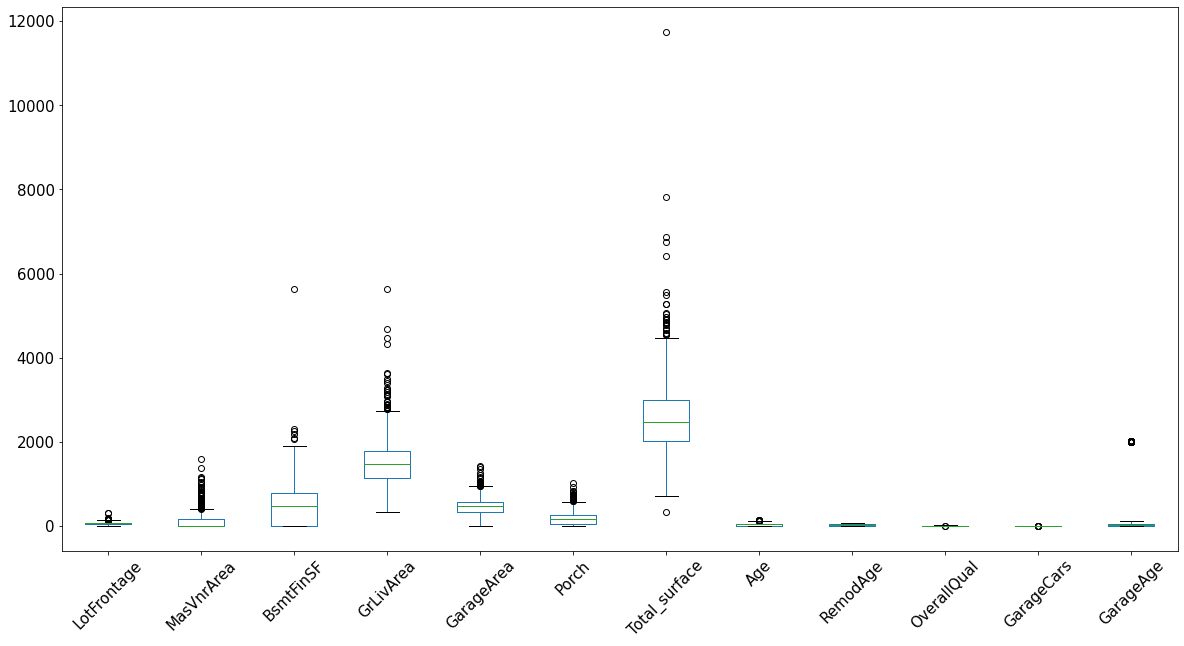

In [721]:
# ax = sns.boxplot(data=DATA[continuous_var_attributes], orient="h", palette="Set2")
boxplot1 = DATA[continuous_var_attributes].boxplot(grid=False, rot=45, fontsize=15)

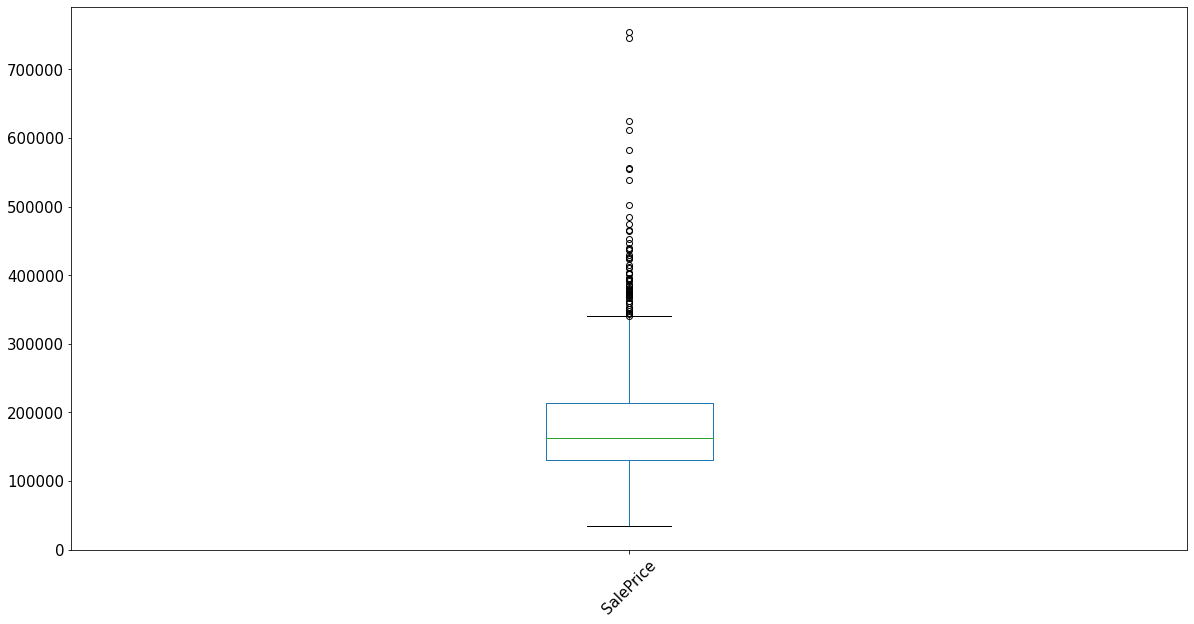

In [722]:
outliers_boxplot=DATA[outliers].boxplot(grid=False, rot=45, fontsize=15)

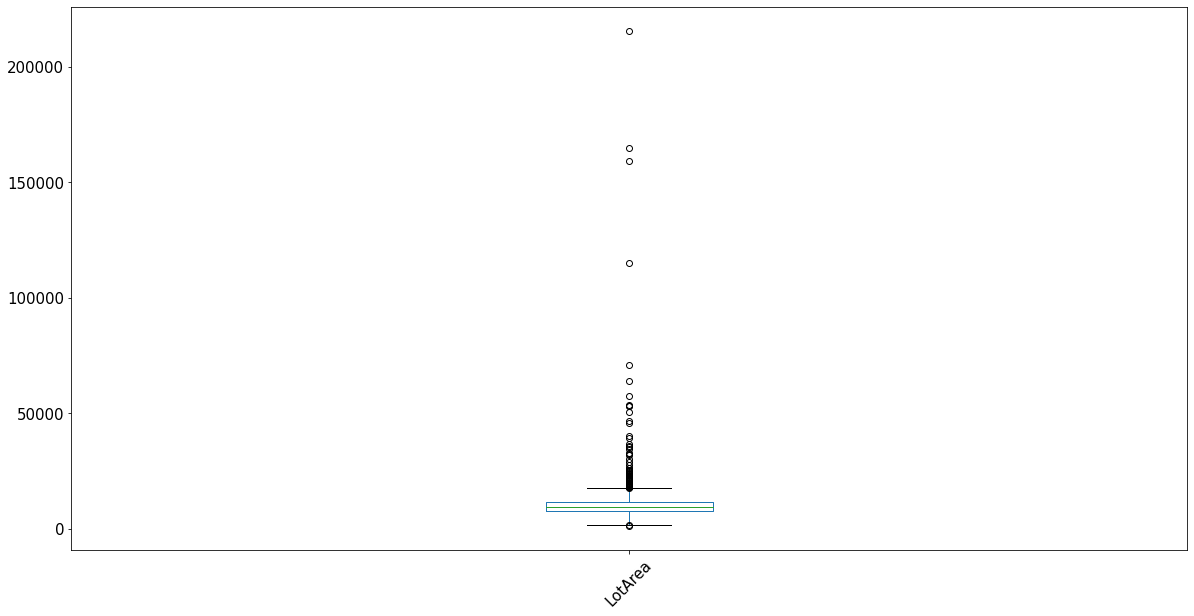

In [723]:
lot_area_boxplot=DATA[lot_area].boxplot(grid=False, rot=45, fontsize=15)

<AxesSubplot:>

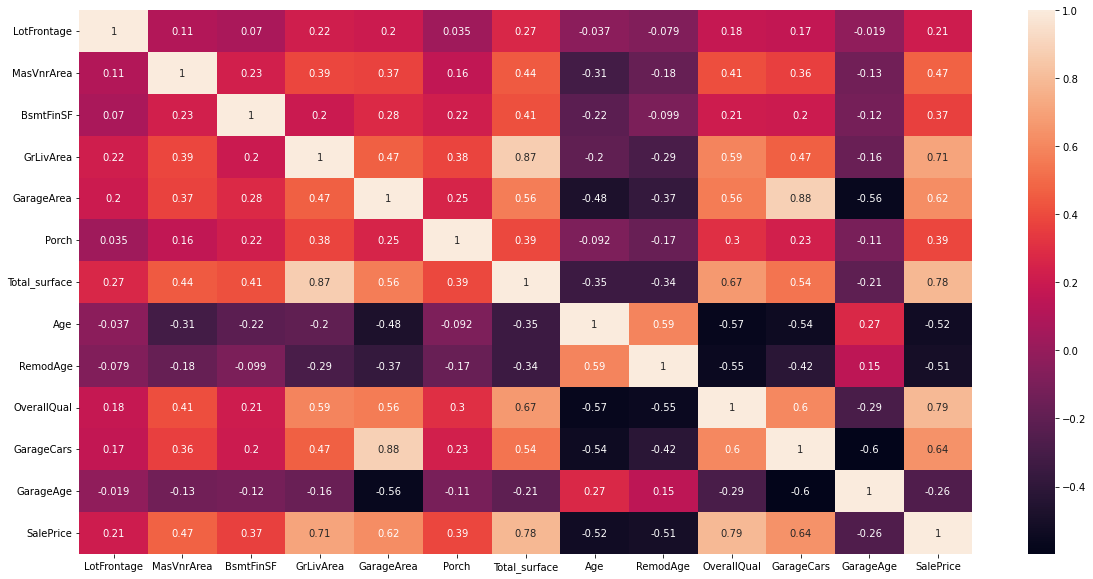

In [724]:
covar_plot = continuous_var_attributes
covar_plot.append('SalePrice')
sns.heatmap(DATA[covar_plot].corr(),annot=True)


In [725]:
Full_Data = DATA

In [726]:
#Full_Data = Full_Data.select_dtypes(exclude=['category'])

In [727]:
Full_Data.shape

(1460, 72)

In [728]:
Full_Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley',
       'Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'LotArea', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'GrLivArea', 'PavedDrive', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice',
       'GarageAgeCat', 'BsmtFinSF', 'Porch', 'Total_s

In [729]:
Full_Data = Full_Data.drop(['Exterior1st', 'Exterior2nd', 'Condition1', 'Condition2'], axis = 1)

In [730]:
Full_Data = pd.get_dummies(Full_Data)

In [731]:
col = list(Full_Data.columns)

In [732]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
Full_Data = min_max_scaler.fit_transform(Full_Data)
Full_Data = pd.DataFrame(Full_Data, columns=col)

In [733]:
Full_Data

Id  LotFrontage  OverallQual  MasVnrArea   LotArea  GrLivArea  \
0     0.000000     0.207668     0.666667    0.122500  0.033420   0.259231   
1     0.000685     0.255591     0.555556    0.000000  0.038795   0.174830   
2     0.001371     0.217252     0.666667    0.101250  0.046507   0.273549   
3     0.002056     0.191693     0.666667    0.000000  0.038561   0.260550   
4     0.002742     0.268371     0.777778    0.218750  0.060576   0.351168   
5     0.003427     0.271565     0.444444    0.000000  0.059899   0.193670   
6     0.004112     0.239617     0.777778    0.116250  0.041057   0.256217   
7     0.004798     0.000000     0.666667    0.150000  0.042450   0.330821   
8     0.005483     0.162939     0.666667    0.000000  0.022529   0.271289   
9     0.006169     0.159744     0.444444    0.000000  0.028605   0.139977   
10    0.006854     0.223642     0.444444    0.000000  0.046274   0.133007   
11    0.007539     0.271565     0.888889    0.178750  0.049658   0.374906   
12    0.008225     0.000000     0.444444    0.000000  0.054537   0.108892   
13    0.008910     0.290735     0.666667    0.191250  0.043712   0.218538   
14    0.009596     0.000000     0.555556    0.132500  0.044965   0.173135   
15    0.010281     0.162939     0.666667    0.000000  0.022529   0.097965   
16    0.010966     0.000000     0.555556    0.112500  0.046465   0.126225   
17    0.011652     0.230032     0.333333    0.000000  0.044362   0.181236   
18    0.012337     0.210863     0.444444    0.000000  0.057935   0.146948   
19    0.013023     0.223642     0.444444    0.000000  0.029260   0.189337   
20    0.013708     0.322684     0.777778    0.237500  0.060366   0.384702   
21    0.014393     0.182109     0.666667    0.000000  0.028741   0.145818   
22    0.015079     0.239617     0.777778    0.175625  0.039459   0.275245   
23    0.015764     0.140575     0.444444    0.000000  0.013667   0.136775   
24    0.016450     0.000000     0.444444    0.000000  0.032466   0.136775   
25    0.017135     0.351438     0.777778    0.400000  0.060436   0.238508   
26    0.017820     0.191693     0.444444    0.000000  0.027577   0.106631   
27    0.018506     0.313099     0.777778    0.125000  0.047573   0.258101   
28    0.019191     0.150160     0.444444    0.000000  0.070210   0.238508   
29    0.019877     0.191693     0.333333    0.000000  0.023483   0.035041   
30    0.020562     0.159744     0.333333    0.000000  0.033654   0.185192   
31    0.021247     0.000000     0.444444    0.000000  0.033859   0.168425   
32    0.021933     0.271565     0.777778    0.000000  0.045568   0.169555   
33    0.022618     0.223642     0.444444    0.000000  0.043245   0.257347   
34    0.023304     0.191693     0.888889    0.153750  0.028105   0.231161   
35    0.023989     0.345048     0.777778    0.082500  0.056641   0.399020   
36    0.024674     0.357827     0.444444    0.000000  0.044680   0.143745   
37    0.025360     0.236422     0.444444    0.406250  0.033803   0.181424   
38    0.026045     0.217252     0.444444    0.000000  0.030952   0.136209   
39    0.026731     0.207668     0.333333    0.000000  0.022155   0.154107   
40    0.027416     0.268371     0.555556    0.063125  0.034392   0.186511   
41    0.028101     0.367412     0.444444    0.000000  0.072939   0.187265   
42    0.028787     0.000000     0.444444    0.000000  0.036832   0.103617   
43    0.029472     0.000000     0.444444    0.000000  0.036925   0.113791   
44    0.030158     0.223642     0.444444    0.000000  0.031059   0.153730   
45    0.030843     0.194888     0.888889    0.257500  0.029718   0.267144   
46    0.031528     0.153355     0.666667    0.000000  0.053855   0.341937   
47    0.032214     0.268371     0.777778    0.000000  0.045787   0.249058   
48    0.032899     0.105431     0.333333    0.000000  0.014751   0.210625   
49    0.033585     0.210863     0.444444    0.000000  0.030111   0.116993   
50    0.034270     0.000000     0.555556    0.000000  0.058749   0.214017   
51    0.

In [734]:
x=Full_Data
x=x.drop('SalePrice',axis=1)
x
y=Full_Data['SalePrice']

# Break off validation set from training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [735]:
x.isnull().sum().sort_values(ascending = False)

Id                       0
BsmtExposure_Gd          0
BsmtFinType1_GLQ         0
BsmtFinType1_BLQ         0
BsmtFinType1_ALQ         0
BsmtExposure_No          0
BsmtExposure_NB          0
BsmtExposure_Mn          0
BsmtExposure_Av          0
BsmtFinType1_NB          0
BsmtCond_TA              0
BsmtCond_Po              0
BsmtCond_No              0
BsmtCond_Gd              0
BsmtCond_Fa              0
BsmtQual_TA              0
BsmtFinType1_LwQ         0
BsmtFinType1_Rec         0
BsmtQual_Fa              0
PavedDrive_P             0
KitchenQual_4            0
KitchenQual_3            0
KitchenQual_2            0
KitchenAbvGr_2           0
KitchenAbvGr_1           0
PavedDrive_Y             0
PavedDrive_N             0
BsmtFinType1_Unf         0
BsmtFinType2_Unf         0
BsmtFinType2_Rec         0
BsmtFinType2_LwQ         0
BsmtFinType2_GLQ         0
BsmtFinType2_BLQ         0
BsmtFinType2_ALQ         0
BsmtQual_Gd              0
BsmtQual_Ex              0
TotRmsAbvGrd_4           0
R

In [736]:
x.head()

Id  LotFrontage  OverallQual  MasVnrArea   LotArea  GrLivArea  \
0  0.000000     0.207668     0.666667     0.12250  0.033420   0.259231   
1  0.000685     0.255591     0.555556     0.00000  0.038795   0.174830   
2  0.001371     0.217252     0.666667     0.10125  0.046507   0.273549   
3  0.002056     0.191693     0.666667     0.00000  0.038561   0.260550   
4  0.002742     0.268371     0.777778     0.21875  0.060576   0.351168   

   GarageYrBlt  GarageCars  GarageArea  BsmtFinSF  ...  SaleType_Oth  \
0     0.996517        0.50    0.386460   0.125089  ...           0.0   
1     0.983085        0.50    0.324401   0.173281  ...           0.0   
2     0.995522        0.50    0.428773   0.086109  ...           0.0   
3     0.994030        0.75    0.452750   0.038271  ...           0.0   
4     0.995025        0.75    0.589563   0.116052  ...           0.0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0          1.0                    0.0                    0.0   
1          1.0                    0.0                    0.0   
2          1.0                    0.0                    0.0   
3          1.0                    1.0                    0.0   
4          1.0                    0.0                    0.0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   SaleCondition_Partial  GarageAgeCat_old  GarageAgeCat_recent  
0                    0.0               0.0                  1.0  
1                    0.0               1.0                  0.0  
2                    0.0               0.0                  1.0  
3                    0.0               1.0                  0.0  
4                    0.0               0.0                  1.0  

[5 rows x 287 columns]

In [737]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [738]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor

In [739]:
X_train

Id  LotFrontage  OverallQual  MasVnrArea   LotArea  GrLivArea  \
618   0.423578     0.287540     0.888889    0.282500  0.048583   0.281462   
870   0.596299     0.191693     0.444444    0.000000  0.024773   0.105501   
92    0.063057     0.255591     0.444444    0.000000  0.056370   0.118689   
817   0.559973     0.000000     0.777778    0.092500  0.055926   0.255275   
302   0.206991     0.376997     0.666667    0.093750  0.057978   0.227393   
1454  0.996573     0.198083     0.666667    0.000000  0.028979   0.167106   
40    0.027416     0.268371     0.555556    0.063125  0.034392   0.186511   
959   0.657300     0.076677     0.666667    0.000000  0.005945   0.203843   
75    0.051405     0.067093     0.333333    0.000000  0.001384   0.123210   
1389  0.952022     0.191693     0.555556    0.000000  0.021968   0.166541   
1254  0.859493     0.191693     0.666667    0.057500  0.026320   0.249058   
689   0.472241     0.194888     0.555556    0.160000  0.029339   0.193670   
648   0.444140     0.223642     0.555556    0.219375  0.029914   0.283534   
247   0.169294     0.239617     0.555556    0.000000  0.046788   0.196119   
1308  0.896504     0.319489     0.444444    0.000000  0.050013   0.148455   
1164  0.797807     0.000000     0.444444    0.000000  0.069443   0.206858   
708   0.485264     0.207668     0.666667    0.000000  0.036075   0.211379   
186   0.127485     0.000000     0.666667    0.000000  0.040417   0.166353   
156   0.106923     0.191693     0.444444    0.000000  0.027577   0.133007   
914   0.626456     0.095847     0.555556    0.047500  0.007946   0.167671   
8     0.005483     0.162939     0.666667    0.000000  0.022529   0.271289   
390   0.267306     0.159744     0.444444    0.000000  0.033209   0.194612   
1333  0.913639     0.191693     0.444444    0.000000  0.027577   0.193293   
1441  0.987663     0.000000     0.555556    0.091875  0.014611   0.096835   
619   0.424263     0.271565     0.777778    0.141250  0.051153   0.363225   
771   0.528444     0.214058     0.333333    0.000000  0.035416   0.166918   
465   0.318711     0.000000     0.666667    0.011250  0.008283   0.203466   
1248  0.855380     0.191693     0.555556    0.000000  0.038795   0.324793   
431   0.295408     0.191693     0.555556    0.000000  0.020033   0.162773   
1288  0.882796     0.127796     0.777778    0.000000  0.020398   0.249623   
1120  0.767649     0.188498     0.555556    0.000000  0.032546   0.127732   
1031  0.706648     0.325879     0.666667    0.000000  0.068069   0.517709   
703   0.481837     0.242812     0.444444    0.000000  0.029587   0.278448   
641   0.439342     0.000000     0.666667    0.000000  0.026876   0.300490   
1331  0.912269     0.175719     0.444444    0.000000  0.044310   0.116805   
540   0.370117     0.271565     0.888889    0.365000  0.062170   0.283346   
1161  0.795751     0.000000     0.555556    0.045000  0.062997   0.246044   
863   0.591501     0.223642     0.444444    0.000000  0.030994   0.153353   
1101  0.754626     0.194888     0.444444    0.000000  0.039534   0.116051   
506   0.346813     0.255591     0.777778    0.078125  0.038580   0.297099   
546   0.374229     0.223642     0.555556    0.000000  0.034761   0.245102   
1051  0.720356     0.329073     0.666667    0.000000  0.046157   0.185004   
997   0.683345     0.000000     0.555556    0.356875  0.048690   0.208742   
1357  0.930089     0.000000     0.444444    0.000000  0.052523   0.140166   
867   0.594243     0.271565     0.333333    0.000000  0.026502   0.148078   
1116  0.764907     0.000000     0.777778    0.000000  0.030148   0.204408   
425   0.291295     0.191693     0.666667    0.000000  0.009713   0.198757   
905   0.620288     0.255591     0.444444    0.068750  0.040291   0.137340   
481   0.329678     0.230032     0.888889    0.351250  0.049293   0.274680   
483   0.331049     0.102236     0.555556    0.072500  0.014957   0.166164   
1382  0.947224     0.191693     0.666667    0.000000  0.027577   0.269028   
1128  0.

In [740]:
svr = SVR(C=20, epsilon = 0.008, gamma= 0.0003)
svr_model = svr.fit(X_train, y_train)
svr_predict = svr_model.predict(X_valid)
print(mean_squared_error(y_valid, svr_predict))

0.003145356731761508


In [741]:
rigid = Ridge(alpha = 1)
rigid_model = rigid.fit(X_train, y_train)
rigid_pred = rigid_model.predict(X_valid)
print(mean_squared_error(y_valid, rigid_pred))

0.0034024143228868773


In [742]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
preds_valid = model.predict(X_valid)
print("RMSE (random forest approach):")
print(mean_squared_error(y_valid, preds_valid))

RMSE (random forest approach):
0.0020234184748400535


In [743]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR.fit(X_train, y_train)
GBR_preds = GBR.predict(X_valid)
print("RMSE (Gradient Boosting approach):")
print(mean_squared_error(y_valid, GBR_preds))


RMSE (Gradient Boosting approach):
0.0016923004874924905


In [744]:
ABR = AdaBoostRegressor(n_estimators=100, random_state=0)
ABR.fit(X_train, y_train)
ABR_preds = ABR.predict(X_valid)
print("RMSE (AdaBoost approach):")
print(mean_squared_error(y_valid, ABR_preds))

RMSE (AdaBoost approach):
0.002409049264695357


In [745]:
BR = BaggingRegressor(n_estimators=100, random_state=0)
BR.fit(X_train, y_train)
BR_preds = BR.predict(X_valid)
print("RMSE (BaggingRegression approach):")
print(mean_squared_error(y_valid, BR_preds))

RMSE (BaggingRegression approach):
0.002052205688283622
